# How to use the BEC module

In this notebook we are going to illustrate how the potential works in the BEC module. We start by initialising a 2 dimensional BEC with dimensions 100x100


In [1]:
import comfit as cf
import matplotlib.pyplot as plt
import numpy as np

bec = cf.BEC(2,xRes=100,yRes=100,gamma=0.05,dt=0.1)


Now we need to initialize the wavefunction. Before we do that we need to specify the potential. The potential is by defoult a function given as

self.V_ext = lambda: self.V0

If you want a potential that is constant in time you can change V_0 to the desired value (defoult is 0). We are now going to set a time dependent potential consisting of a harmonic potential with a Gaussian stirrer. 



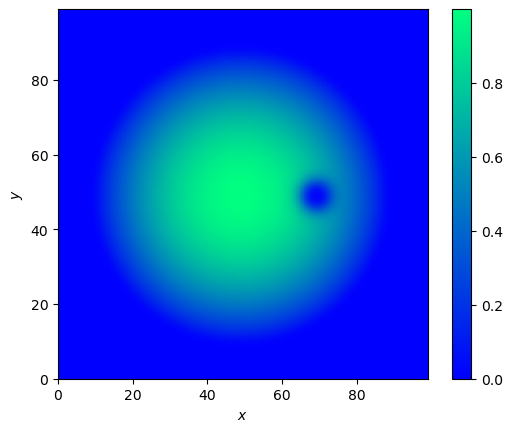

In [2]:
### First we set the size of the harmonic
R_tf = 40

### Here we set the size and velocity of the stirrer
stirrer_radius = 20
stirrer_velocity = 0.6
freq = stirrer_velocity/stirrer_radius
size =4
strength = .9

def V_t():
    pos_x = bec.xmid + stirrer_radius * np.cos(freq * bec.t)
    pos_y = bec.ymid + stirrer_radius * np.sin(freq * bec.t)
    stirrer = bec.calc_gaussian_stirring_potential(size, strength, [pos_x, pos_y])
    harmonic = bec.set_harmonic_potential(R_tf)
    return   harmonic + stirrer

bec.V0 = V_t()

bec.set_initial_condition_Thomas_Fermi()
bec.evolve_relax_BEC(20,'ETD4RK')

bec.plot_field(np.abs(bec.psi)**2,cmap_symmetric=False,colormap = 'winter')
plt.show()


Notize that to initialize the system close to the ground-state of the given potential we have to evolve the system using the bec.evolve_relax_BEC() function. For this to work properly the bec.V0 has to be set to the t=0 value of the potential. After the initial relaxation we can set the potential to be time dependent using the function bec.set_time_dependent_potential(V_t)

Also notize that the time dependence of V_t() has to be through the variable bec.t which is updated in the evolve functions (this is also why the potential has to be set as a constant before the relaxation step). 

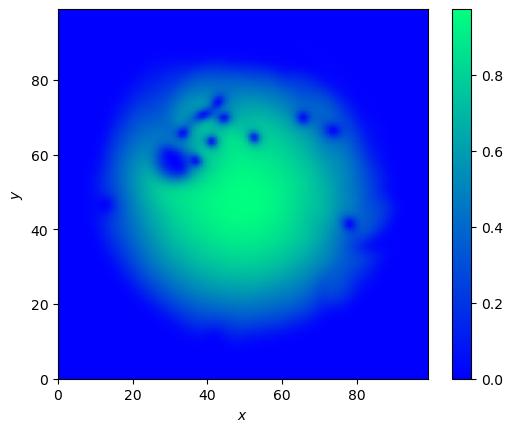

In [3]:

### Updating the potential to the timedependent function V_t()
bec.set_time_dependent_potential(V_t)

timesteps = int(300/bec.dt)

bec.evolve_dGPE(timesteps,'ETD4RK')

bec.plot_field(np.abs(bec.psi)**2,cmap_symmetric=False,colormap = 'winter')
plt.show()

Now we set the potential to be time independent again and run the system again. The non-zero bec.gamma are going to relax the system.

In [4]:
bec.V0 = V_t()


bec.V_ext = lambda: bec.V0

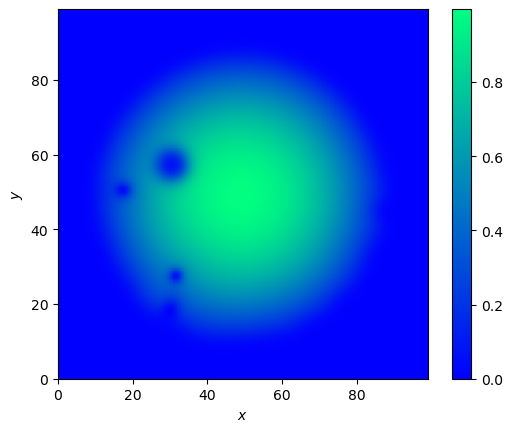

In [5]:
bec.evolve_dGPE(timesteps,'ETD4RK')


timesteps = int(200/bec.dt)
bec.plot_field(np.abs(bec.psi)**2,cmap_symmetric=False,colormap = 'winter')
plt.show()